In [3]:
using Images, TestImages, MappedArrays

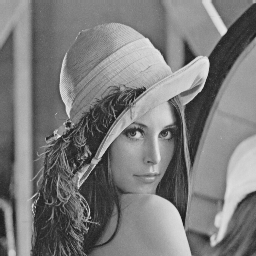

In [32]:
img = testimage("lena_gray_256")

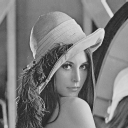

In [33]:
img = imresize(img, 128, 128)

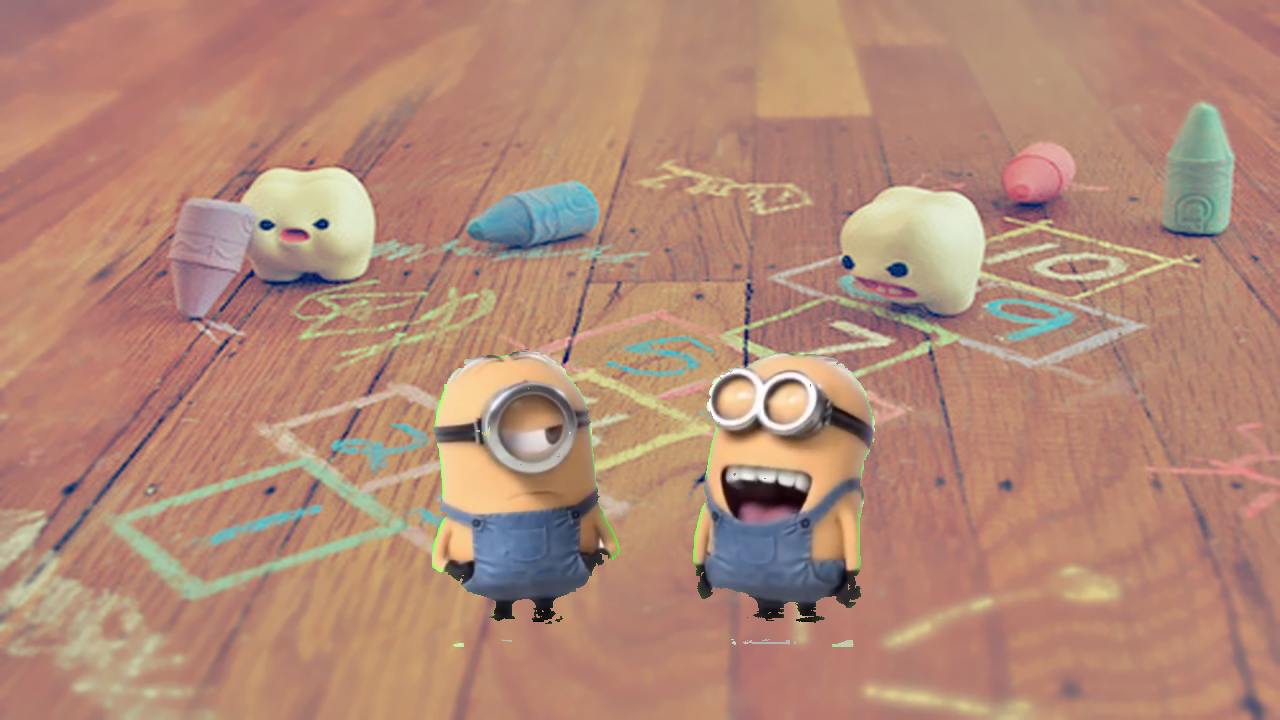

In [37]:
function screenProcessing2(front_img, background_img, hsv_lower, hsv_upper)
    """
        input: a front image, the background image,
            the hsv_lower and hsv_upper bounds (indicates the color range)
        output: a new image with masked front_img overlayed on background_img
    """

    background_resized = imresize(background_img, size(front_img))

    inHSVRange(pixel) =
        let hsv = HSV(pixel)
            hsv_lower.h ≤ hsv.h ≤ hsv_upper.h &&
            hsv_lower.s ≤ hsv.s ≤ hsv_upper.s &&
            hsv_lower.v ≤ hsv.v ≤ hsv_upper.v
        end

    map((front_pixel, back_pixel) ->
            inHSVRange(front_pixel) ? back_pixel : front_pixel,
        front_img,
        background_resized)
end

# TASK #8: Open a background image --> sample: background.jpg 

background = load("background.jpg")

# TASK #9: Open a greenscreen/front image --> sample: minion.jpg

minion = load("minion.jpg")

screenProcessing2(minion, background, HSV(108, 0, 0), HSV(160, 1, 1))

In [38]:
HSV(108, 0, 0)

In [39]:
HSV(160, 1, 1)

In [33]:
function screenProcessing(front_img, background_img)
    """
        input: a front image, the background image, 
            the hsv_lower and hsv_upper bounds (indicates the color range)
        output: a new image with masked front_img overlayed on background_img
    """

    h_up, s_up, v_up = 80, 255, 255
    h_low, s_low, v_low = 54, 1, 0
    
    background_img = imresize(background_img, size(front_img, 1), size(front_img, 2))
    
    function isGreen(pixel)
        let hsv = HSV(pixel)
            hsv.h <= h_up && hsv.s <= s_up/255 && hsv.v <= v_up/255 && 
            hsv.h => h_low && hsv.s => s_low/255 && hsv.v => v_low/255 
        end
    end
    
    result = map((front_pixel, back_pixel) -> isGreen(front_pixel) ? back_pixel : front_pixel,
                 front_img, 
                 background_img)

    return result
end

screenProcessing (generic function with 1 method)

In [34]:
# TASK #8: Open a background image --> sample: background.jpg 

background = load("background.jpg")

# TASK #9: Open a greenscreen/front image --> sample: minion.jpg

minion = load("minion.jpg")

# TASK #11: Call screenProcessing, using the inputs we've defined above

result = screenProcessing(minion, background)

TypeError: TypeError: non-boolean (Int64) used in boolean context

In [85]:
using MappedArrays

In [6]:
function screenProcessing2(front_img, background_img)
    """
        input: a front image, the background image, 
            the hsv_lower and hsv_upper bounds (indicates the color range)
        output: a new image with masked front_img overlayed on background_img
    """
    # TASK #1: Convert front_img into hsv
    
    front_hsv = HSV.(front_img)
    
    # TASK #2: Create a mask usingng the hsv ranges
    
    white = RGB(1, 1, 1)
    black = RGB(0, 0, 0)

    h, s, v = 255, 255, 50
    
    mask = map(color -> let hsv = HSV(color)
                          hsv.h <= h && hsv.s <= s/255 && hsv.v <= v/255
                        end,
               front_hsv)
    
    mask_image = map(bool -> bool ? white : black,
                 mask)

    mask_function(color, bool) = bool ? color : black
    unmask_function(color, bool) = bool ? black :  color

    # TASK #3: Create an inverse of the mask using cv 2.bitwise_not
    
    front_mask_inv = map(mask_function, front_hsv, mask)
    
    # Make sure that background_img is the same shape as the front_img
    cropped_background_img = imresize(background_img, size(front_img, 1), size(front_img, 2))
    
    # TASK #4: Use cv2.bitwise_and & inversed mask on the cropped_background_img (step 1)

    just_background = map(unmask_function, cropped_background_img, mask)
     
    # TASK #5: Use cv2.bitwise_and & mask on front_img (step 2)

    just_minion = map(unmask_function, front_img, mask)
    
    # TASK #6: Add the two masked images together (see step 3)
    
    result = just_background + just_minion
    
    # TASK #7: Return the result from TASK #6 (step 4)
    return result
end

screenProcessing (generic function with 1 method)

In [44]:
a = [1,4,9,16]

4-element Array{Int64,1}:
  1
  4
  9
 16

In [45]:
b = mappedarray(sqrt, a)

4-element mappedarray(sqrt, ::Array{Int64,1}) with eltype Float64:
 1.0
 2.0
 3.0
 4.0

In [46]:
c = mappedarray(sin, a)

4-element mappedarray(sin, ::Array{Int64,1}) with eltype Float64:
  0.8414709848078965
 -0.7568024953079282
  0.4121184852417566
 -0.2879033166650653

In [47]:
d = copy(a)

4-element Array{Int64,1}:
  1
  4
  9
 16

In [48]:
a[4] = 5
a

4-element Array{Int64,1}:
 1
 4
 9
 5

In [49]:
d

4-element Array{Int64,1}:
  1
  4
  9
 16

In [51]:
e = deepcopy(a)
e

4-element Array{Int64,1}:
 1
 4
 9
 5

In [29]:
using Colors, Images
r = range(0,stop=1,length=11)
b = range(0,stop=1,length=11)
img1d = colorview(RGB, r, zeroarray, b)

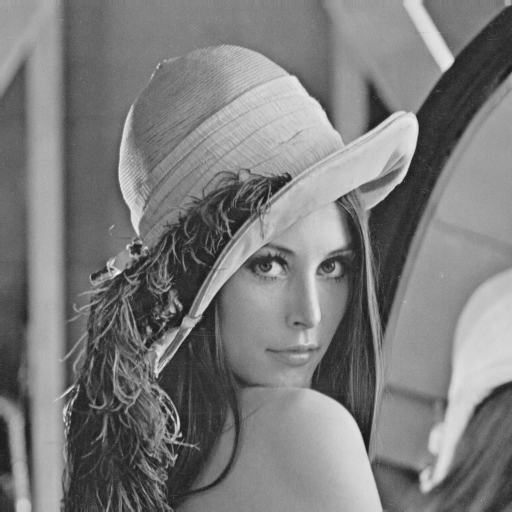

In [104]:
img = testimage("lena_gray_512")

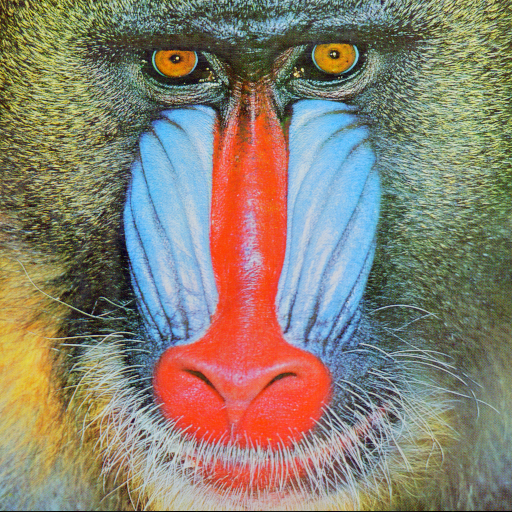

In [106]:
img2 = testimage("mandrill")

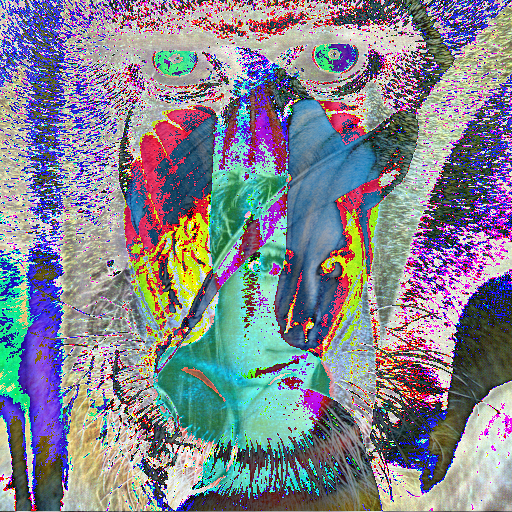

In [107]:
img + img2